# Capstone Project
---

This project aims to predict whether a message is spam or not using a dataset containing various different sms messages and their label status. 
More information can be found [here](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset/data).

To achieve this, we employed 4 different machine learning models : Random Forest Classifier, Logistic Regression, Support Vector Classifier (SVC), and K-Nearest Neighbor Classifier. For this project, there will be 2 different methods in terms of preparing the data for the models.

- Method 1: Manipulate the sms messages using a text preprocessing technique in Natural Language Processing (NLP) that reduces words to their base or root form.

- Method 2: Feature engineer multiple variables that quantify characteristics of each sms messages. 


## Notebook content

1. Import Necessary Libraries, Reading, Exploring and Preparing Data
2. Method 1
3. Method 2
4. Model Prediction of New Input



## 1. Import Libraries, Reading, Exploring and Preparing Data

In [1]:
#Imports
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
#Download stopwords packages
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Michael
[nltk_data]     2023\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
#Read csv and load into pandas dataframe
df = pd.read_csv('./data/spam.csv',encoding='latin1')  

#The file contains special character,
#using encoding='latin1' ensures the data is read correctly                                                        

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
#Removing unimportant columns
df = df.iloc[:,:-3]
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
#rename column values
df = df.rename(columns={'v1':'label','v2':'message'})

In [8]:
#Checking for null values
df.isna().sum()

label      0
message    0
dtype: int64

In [10]:
#Create new column with numeric labels for ham/spam
df['label_num'] = df['label'].replace({'ham':0,'spam':1})

In [11]:
#Checking for imbalance in dataset
df.label.value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

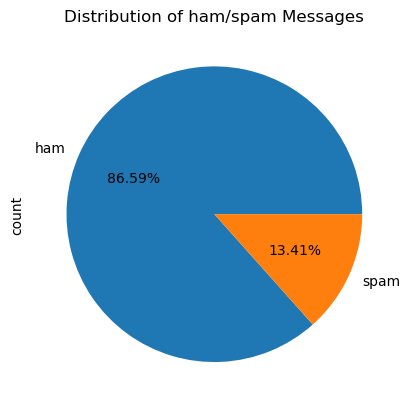

In [12]:
#Pie plot
df['label'].value_counts().plot.pie(autopct='%.2f%%')
plt.title('Distribution of ham/spam Messages')
plt.show()

In [13]:
#Defining variables for counts of labels
not_spam = df.label.value_counts().iloc[0]
spam = df.label.value_counts().iloc[1]

In [14]:
#Null accuracy
null_acc = not_spam/(not_spam + spam)
print(f'Null accuracy: {null_acc}')

Null accuracy: 0.8659368269921034


Seeing such a high null accuracy due to the imbalance in the dataset means the model must perform significantly better to be of any practical use.

# 2. Method 1
---

### 2.1 Preprocessing Data

In [16]:
#Initialize Porterstemmer
stemmer = PorterStemmer()

#Placeholder for processed emails
transformed_message = []

#Define set of 'common' words using stopwords
stopwords_set = set(stopwords.words('english'))

#For loop to iterate through each row/email 
for i in range(len(df)):
    #Converts all letters in email to lowercase
    text = df['message'].iloc[i].lower()
    
    #Remove all punctuation from text then split and store each word into a list
    text = text.translate(str.maketrans('','',string.punctuation)).split()
    
    #For all words not in stopwards_set, apply stemmer to get base version of word
    text = [stemmer.stem(word) for word in text if word not in stopwords_set]
    
    #Join list of words into one text, seperated by a space
    text = ' '.join(text)
    
    #Add processed email to list
    transformed_message.append(text)

###  2.2 Model Testing

In [17]:
#Initialize CountVectorizer
vectorizer = CountVectorizer()

#Seperate independent feature X from target variable y
X = vectorizer.fit_transform(transformed_message).toarray()   #Transform email into numerical format and put in an array
y = df.label

#Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Random Forest Classifier

In [18]:
#Create Random forest model
rfc = RandomForestClassifier(n_jobs=-1)
#Fit model
rfc.fit(X_train,y_train)
#Model Prediction
rfc_y_pred = rfc.predict(X_test)

In [19]:
print('Random Forest Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, rfc_y_pred)))

Random Forest Model accuracy score: 0.9758


### SVC Model

In [20]:
svc = SVC(class_weight='balanced')

svc.fit(X_train,y_train)

svc_y_pred = svc.predict(X_test)

In [21]:
print('SVC Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, svc_y_pred)))

SVC Model accuracy score: 0.9776


### Logistic Model

In [22]:
log = LogisticRegression()
log.fit(X_train,y_train)
log_y_pred = log.predict(X_test)

In [23]:
print('Logistic Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, log_y_pred)))

Logistic Model accuracy score: 0.9794


### KNN Model

In [24]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_y_pred = knn.predict(X_test)

In [25]:
print('KNN Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, knn_y_pred)))

KNN Model accuracy score: 0.9166


Now the methods used to process the data to use for these models, essentially renders the text as simple as possible, removing special characters, punctuation, common words (is,and,etc). But what if these characteristics had a correlation to whether these messages were spam or not. Let's perform some feature engineering and explore whether there's a correlation between spam messages and these variables.

# 3. Method 2

### 3.1 Feature Engineering

In [26]:
#Lets look at some spam messages!
df[df['label']=='spam'].sample(5)['message'].values

array(['Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed å£1000 cash or å£5000 prize!',
       'PRIVATE! Your 2003 Account Statement for <fone no> shows 800 un-redeemed S. I. M. points. Call 08715203656 Identifier Code: 42049 Expires 26/10/04',
       'Ever thought about living a good life with a perfect partner? Just txt back NAME and AGE to join the mobile community. (100p/SMS)',
       'Do you want a new video handset? 750 anytime any network mins? Half Price Line Rental? Camcorder? Reply or call 08000930705 for delivery tomorrow',
       'PRIVATE! Your 2004 Account Statement for 07742676969 shows 786 unredeemed Bonus Points. To claim call 08719180248 Identifier Code: 45239 Expires'],
      dtype=object)

What do we notice? Just from the samples, we notice the word 'Free', exclamation points, money, numbers, capitalized words, etc. Let's quantify these characteristics in order to use it in our models!  

In [27]:
#Create functions to quantify certain aspects of email messages

def lower_score(message):
    #Calculate the ratio of lowercase letters with respect to the message length
    if len(message) == 0:  # Avoid division by zero for empty strings
        return 0
    return sum(1 for char_ in message if char_.islower()) / len(message)

def upper_score(message):
    #Calculate the ratio of uppercase letters with respect to the message length
    if len(message) == 0:  
        return 0
    return sum(1 for char_ in message if char_.isupper()) / len(message)

def symbol_score(message):
    #Returns the ratio of symbols and punctuation with respect to the message length
    symbols = string.punctuation
    if len(message) == 0:  
        return 0
    return sum(1 for char_ in message if char_ in symbols) / len(message)

def number_score(message):
    #Returns the ratio of numbers with respect to the message length
    if len(message) == 0:  
        return 0
    return sum(1 for char_ in message if char_.isdigit()) / len(message)

def space_score(message):
    #Returns the ratio of spaces with respect to the message length
    if len(message) == 0:  
        return 0
    return message.count(' ') / len(message)

def length(message):
    #Returns the length of the message
    return len(message)

In [28]:
#Create copy of dataframe
df2 = df.copy()

#Feature engineering
df2['lower_score'] = df2['message'].apply(lower_score)
df2['upper_score'] = df2['message'].apply(upper_score)
df2['symbol_score'] = df2['message'].apply(symbol_score)
df2['number_score'] = df2['message'].apply(number_score)
df2['space_score'] = df2['message'].apply(space_score)
df2['length'] = df2['message'].apply(length)

df2

,label,message,label_num,lower_score,upper_score,symbol_score,number_score,space_score,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,0.720721,0.027027,0.081081,0.000000,0.171171,111
1,ham,Ok lar... Joking wif u oni...,0,0.551724,0.068966,0.206897,0.000000,0.172414,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,0.561290,0.064516,0.038710,0.161290,0.174194,155
3,ham,U dun say so early hor... U c already then say...,0,0.632653,0.040816,0.122449,0.000000,0.204082,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,0.737705,0.032787,0.032787,0.000000,0.196721,61
...,...,...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,0.577640,0.055901,0.049689,0.130435,0.180124,161
5568,ham,Will Ì_ b going to esplanade fr home?,0,0.702703,0.054054,0.054054,0.000000,0.189189,37
5569,ham,"Pity, * was in mood for that. So...any other s...",0,0.684211,0.035088,0.122807,0.000000,0.157895,57
5570,ham,The guy did some bitching but I acted like i'd...,0,0.776000,0.016000,0.008000,0.000000,0.200000,125


### 3.2 Visualization

C:\Users\Michael 2023\AppData\Local\Temp\ipykernel_5616\3945758536.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(corr, palette='viridis')


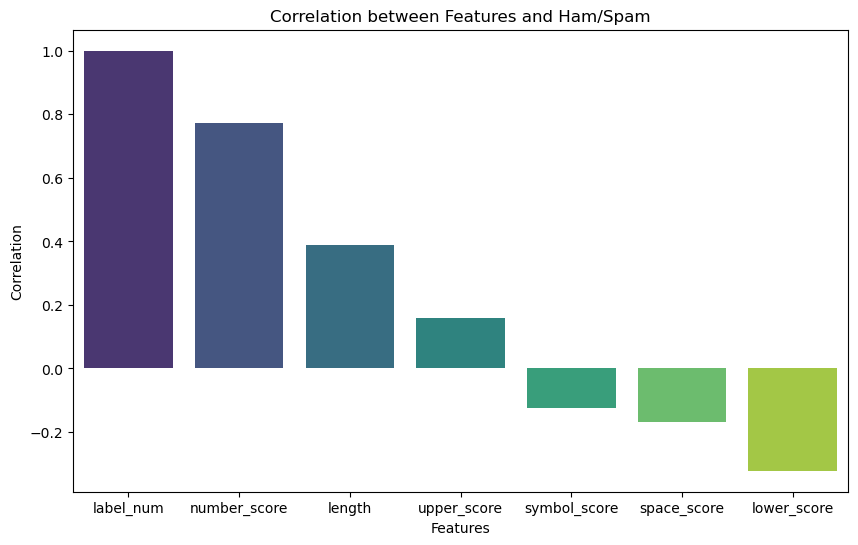

In [29]:
#Plotting correlation between variables
#Correlation
corr = df2.corr(numeric_only=True)['label_num'].sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(corr, palette='viridis')
plt.title('Correlation between Features and Ham/Spam')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()

The correlation plot indicates a significant positive correlation with number_score. It does make sense since typical spam messages contain phone numbers or prize money amounts.

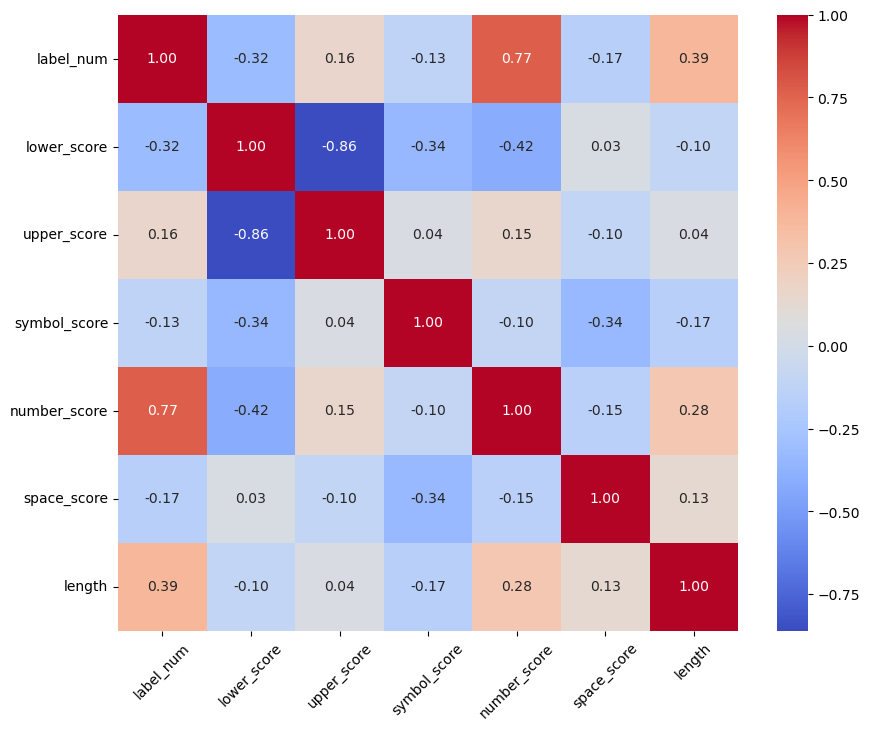

In [30]:
#Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df2.corr(numeric_only=True), cmap='coolwarm', annot=True, fmt='.2f')
plt.xticks(rotation = 45)
plt.show()

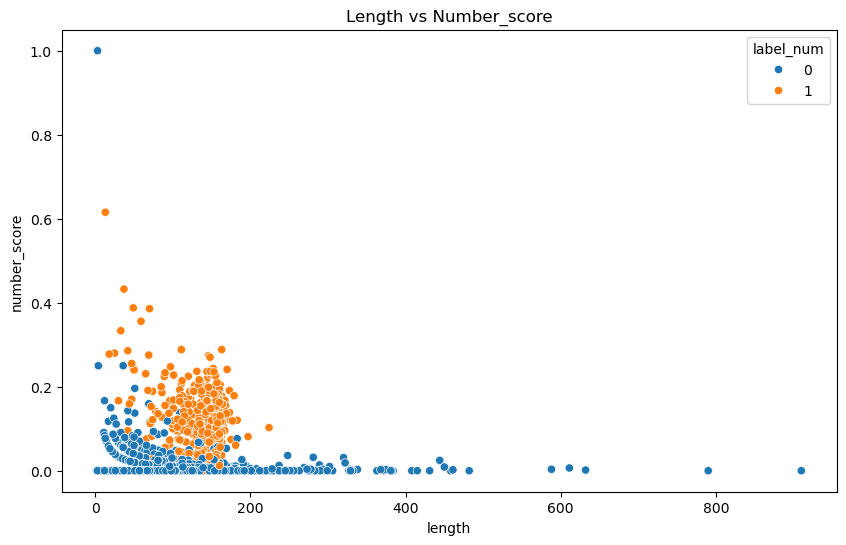

In [31]:
#Scatterplots
plt.figure(figsize=(10,6))
sns.scatterplot(df2, x = 'length', y = 'number_score', hue='label_num')
plt.title('Length vs Number_score')
plt.show()

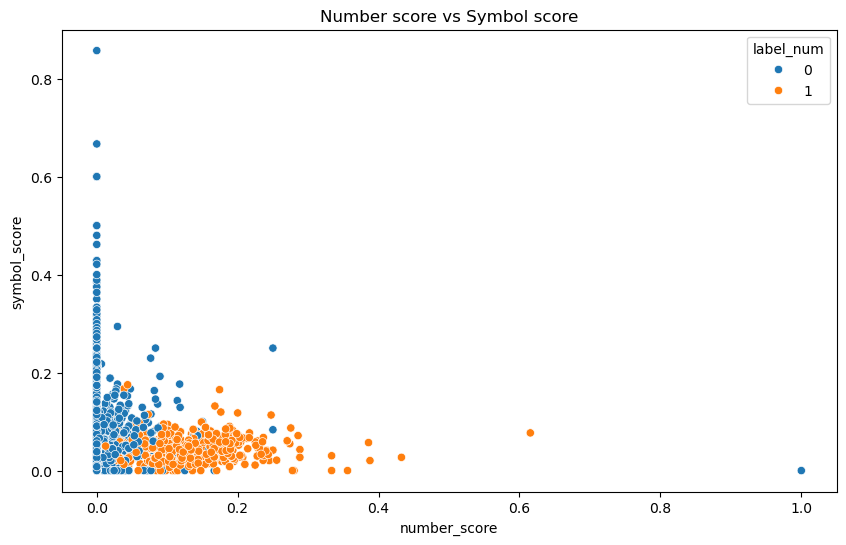

In [32]:
plt.figure(figsize=(10,6))
sns.scatterplot(df2, x = 'number_score', y = 'symbol_score', hue='label_num')
plt.title('Number score vs Symbol score')
plt.show()

Although the scatter points are located fairly close to each other, there is definitely an observable distintion between where the spam vs ham messages are located based on the feature scores.

### 3.3 Model Testing 

In [33]:
#Seperate independent feature X from target variable y
X2 = df2[['lower_score', 'upper_score','symbol_score', 'number_score', 'space_score', 'length']]
y2 = df2['label_num']

#Splitting the data into train and test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=1)

In [34]:
#Scale data
scaler = StandardScaler()
scaled_X2_train = scaler.fit_transform(X2_train)
scaled_X2_test = scaler.transform(X2_test)

### RandomForest Classifier Model

In [35]:
#Create param_grid for gridsearch
param_grid1 = {
    'criterion':['entropy','gini'],
    'n_estimators': [25,50,100,150],
    'max_depth': [3,5,7,9],
    'max_features':['sqrt','log2']
    
}

#Tune the class_weight parameter to 'balance' in an attempt to deal with the imbalance
rfc_grid = GridSearchCV(RandomForestClassifier(class_weight='balanced'), param_grid=param_grid1, cv=5)

#Fit model
rfc_grid.fit(scaled_X2_train, y2_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 5, 7, 9],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [25, 50, 100, 150]})

In [36]:
#Best estimators
rfc_grid.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 25,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [37]:
#Final Random Forest model
rfc2 = RandomForestClassifier(max_depth=9, n_estimators=50, max_features='sqrt' ,criterion='entropy', class_weight='balanced')

rfc2.fit(scaled_X2_train,y2_train)

#Evaluate model
rfc2_y_pred = rfc2.predict(scaled_X2_test)

#Accuracy score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y2_test, rfc2_y_pred)))

Model accuracy score: 0.9815


In [38]:
#print the scores on training and test set

print('Training set score: {:.4f}'.format(rfc2.score(scaled_X2_train, y2_train)))

print('Test set score: {:.4f}'.format(rfc2.score(scaled_X2_test, y2_test)))

Training set score: 0.9974
Test set score: 0.9815


Here, the training-set accuracy score is 0.9979 while the test-set accuracy to be 0.9815. The two accuracies are quite close to each other showing no signs of overfitting.

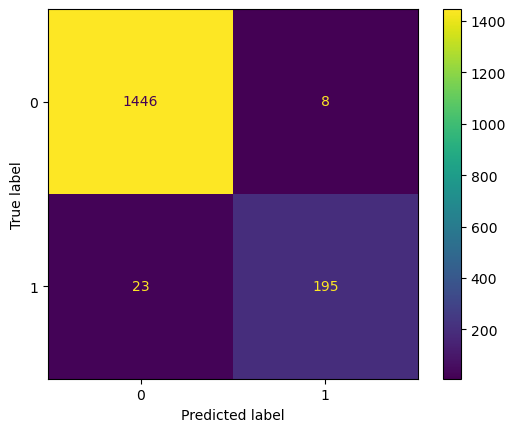

In [39]:
#Plot confusion Matrix
cm_forest = confusion_matrix(y2_test,rfc2_y_pred)
disp = ConfusionMatrixDisplay(cm_forest,display_labels=rfc2.classes_)
disp.plot()
plt.show()

In [40]:
#Classification report of rfc2 model
print(classification_report(y2_test, rfc2_y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1454
           1       0.96      0.89      0.93       218

    accuracy                           0.98      1672
   macro avg       0.97      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672



### Logistic Regression Model

In [41]:
#Create param_grid for gridsearch
param_grid2 ={'penalty':['l1','l2'],
              'C':np.logspace(0,4,10),
              'max_iter': [500,1000,2500,5000]
              }

#Apply gridsearch
log_grid = GridSearchCV(LogisticRegression(class_weight = 'balanced', solver = 'liblinear'), param_grid=param_grid2, cv=5)

#Fit model
log_grid.fit(scaled_X2_train, y2_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          solver='liblinear'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'max_iter': [500, 1000, 2500, 5000],
                         'penalty': ['l1', 'l2']})

In [42]:
#Best estimators
log_grid.best_estimator_.get_params()

{'C': 1.0,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 500,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [43]:
#Final logistic model
log2 = LogisticRegression(class_weight = 'balanced', solver = 'liblinear', C=1.0, max_iter=500, penalty='l2')

log2.fit(scaled_X2_train,y2_train)

#Evaluate model
log2_y_pred = log2.predict(scaled_X2_test)

#Accuracy score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y2_test, log2_y_pred)))

Model accuracy score: 0.9474


In [44]:
#print the scores on training and test set

print('Training set score: {:.4f}'.format(log2.score(scaled_X2_train, y2_train)))

print('Test set score: {:.4f}'.format(log2.score(scaled_X2_test, y2_test)))

Training set score: 0.9546
Test set score: 0.9474


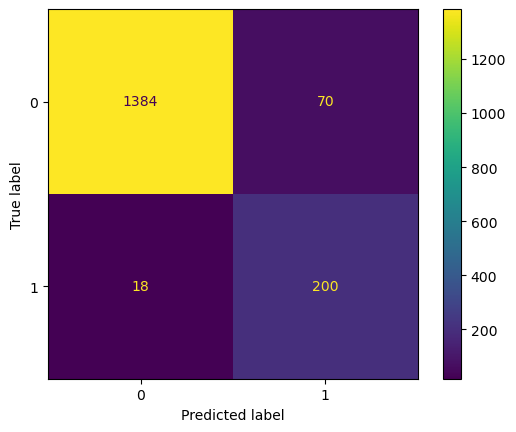

In [45]:
#Plot confusion Matrix
cm_log = confusion_matrix(y2_test,log2_y_pred)
disp = ConfusionMatrixDisplay(cm_log,display_labels=log2.classes_)
disp.plot()
plt.show()

In [46]:
#Classification report of log2 model
print(classification_report(y2_test, log2_y_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1454
           1       0.74      0.92      0.82       218

    accuracy                           0.95      1672
   macro avg       0.86      0.93      0.89      1672
weighted avg       0.96      0.95      0.95      1672



### SVC Model

In [47]:
#Create param_grid for gridsearch
param_grid3 ={'C': [0.001,0.01,0.1,0.5,1],
              'gamma': ['scale','auto'],
              'kernel': ['rbf','poly','linear','sigmoid']
              }

#Apply gridsearch
svc_grid = GridSearchCV(SVC(class_weight = 'balanced'), param_grid=param_grid3, cv=5)

#Fit model
svc_grid.fit(scaled_X2_train, y2_train)

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'poly', 'linear', 'sigmoid']})

In [48]:
#Best estimators
svc_grid.best_estimator_.get_params()

{'C': 0.01,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': 'balanced',
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [49]:
#Final svc model
svc2 = SVC(class_weight='balanced', C=0.01, gamma = 'scale', kernel = 'rbf')

svc2.fit(scaled_X2_train,y2_train)

#Evaluate model
svc2_y_pred = svc2.predict(scaled_X2_test)

#Accuracy score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y2_test, svc2_y_pred)))

Model accuracy score: 0.9767


In [50]:
#print the scores on training and test set

print('Training set score: {:.4f}'.format(svc2.score(scaled_X2_train, y2_train)))

print('Test set score: {:.4f}'.format(svc2.score(scaled_X2_test, y2_test)))

Training set score: 0.9721
Test set score: 0.9767


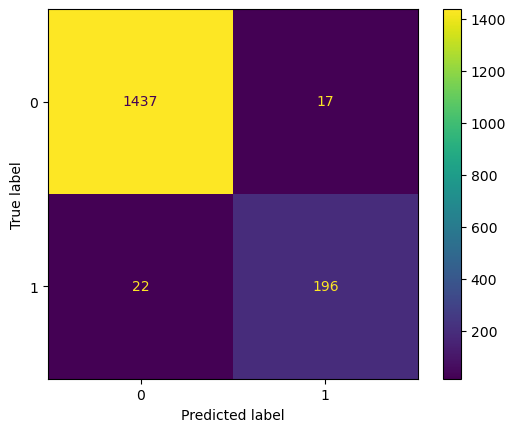

In [51]:
#Plot confusion Matrix
cm_svc = confusion_matrix(y2_test,svc2_y_pred)
disp = ConfusionMatrixDisplay(cm_svc,display_labels=svc2.classes_)
disp.plot()
plt.show()

In [52]:
#Classification report of svc2 model
print(classification_report(y2_test, svc2_y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1454
           1       0.92      0.90      0.91       218

    accuracy                           0.98      1672
   macro avg       0.95      0.94      0.95      1672
weighted avg       0.98      0.98      0.98      1672



### KNN Model

In [53]:
#Create param_grid for gridsearch
k_values = list(range(1,20))

param_grid4 ={'n_neighbors': k_values,
              'weights':['uniform','distance'],
              'p':[1,2],
              'metric':['minkowski', 'euclidean', 'manhattan']
              }

#Apply gridsearch
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid4, cv=5)

#Fit model
knn_grid.fit(scaled_X2_train, y2_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [54]:
knn_grid.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 1,
 'weights': 'distance'}

In [55]:
#Final KNN model
knn2 = KNeighborsClassifier(n_neighbors=5,weights='distance',p=1,metric='minkowski')

knn2.fit(scaled_X2_train,y2_train)

#Evaluate model
knn2_y_pred = knn2.predict(scaled_X2_test)

#Accuracy score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y2_test, knn2_y_pred)))

Model accuracy score: 0.9797


In [56]:
#print the scores on training and test set

print('Training set score: {:.4f}'.format(knn2.score(scaled_X2_train, y2_train)))

print('Test set score: {:.4f}'.format(knn2.score(scaled_X2_test, y2_test)))

Training set score: 1.0000
Test set score: 0.9797


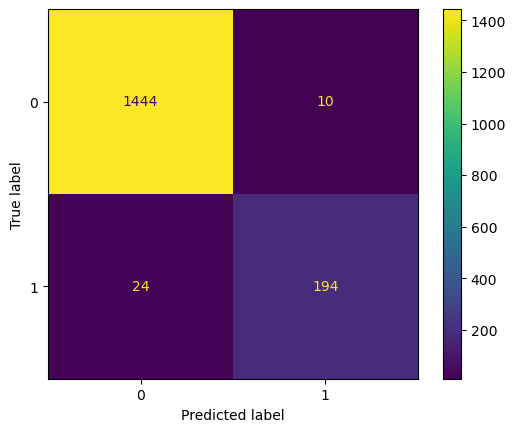

In [57]:
#Plot confusion Matrix
cm_knn = confusion_matrix(y2_test,knn2_y_pred)
disp = ConfusionMatrixDisplay(cm_knn,display_labels=knn2.classes_)
disp.plot()
plt.show()

In [58]:
#Classification report of knn2 model
print(classification_report(y2_test, knn2_y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1454
           1       0.95      0.89      0.92       218

    accuracy                           0.98      1672
   macro avg       0.97      0.94      0.95      1672
weighted avg       0.98      0.98      0.98      1672



Out of the 4 models tested for our second approach, the random forest model performed slightly better then the rest with a model accuracy score of 0.9815. Thus, it will be chosen for our final model.

## 4. Model Prediction of New Input

Using the random forest model, evaluate whether the new input is ham or spam.

For our new input, we're going to use chatGPT to generate a typical spam message and see if our model can make the correct prediction!

In [60]:
#Create fake spam 
fake_spam ="URGENT: Claim Your $10,000 Prize Now! Congratulations! You have been selected as the lucky winner of our exclusive $10,000 giveaway. This is a once-in-a-lifetime opportunity to claim a huge cash prize with just a few simple steps. Your prize code: WIN-2024-XXXXX"
#Put fake_spam into a dataframe
input_df = pd.DataFrame({'message':[fake_spam]})

In [61]:
#Modify input
#Feature engineering
input_df['lower_score'] = input_df['message'].apply(lower_score)
input_df['upper_score'] = input_df['message'].apply(upper_score)
input_df['symbol_score'] = input_df['message'].apply(symbol_score)
input_df['number_score'] = input_df['message'].apply(number_score)
input_df['space_score'] = input_df['message'].apply(space_score)
input_df['length'] = input_df['message'].apply(length)


In [62]:
input_df

,message,lower_score,upper_score,symbol_score,number_score,space_score,length
0,"URGENT: Claim Your $10,000 Prize Now! Congratu...",0.652672,0.083969,0.057252,0.053435,0.152672,262


In [64]:
#Extract features from input
X_input = input_df[['lower_score', 'upper_score','symbol_score', 'number_score', 'space_score', 'length']]
#Scale input
scaled_X_input = scaler.transform(X_input)

#Evaluate models predictions
predictions = rfc2.predict(scaled_X_input)
predictions

array([1], dtype=int64)

The model predicted the correct label which was spam!

In conclusion, our final random forest model (rfc2) was able to achieve the highest accuracy score of 0.9815 using our 2nd approach where we used feature engineering. It was interesting how with the first method, the KNN model had the poorest results whereas in the second method, it had one of the best results out of the 4 models. In this case, KNN had an accuracy score of 0.9166 for the first method, which compared to the null accuracy of 0.8659 is not much better. However, using the feature engineered ratios, the KNN model had a model accuracy score of 0.9797. It just goes to show that certain models perform better depending on the type of data it is working with.